In [1]:
import numpy as np
import math

# Global Variables
boundary = []
obstacles = []
robot_path = []
pos_orig = ()
pos_dest = ()

def setBoundary():
  #Square boundary defined by the lower left and upper right corners
  limits = [0, 0, 9, 9]
  return limits

def setObstacles():
  # x-y coordinates of all the obstacles
  blocks = [(0,4), (0,5), (4,0), (4,4), (4,5), (4,9), (5,0), (5,4), (5,5), (5,9), (9,4), (9,5)]
  return blocks

def setStartStop():
  origin = (0,0)       # x-y coordinate of the starting position
  destination = (9,9)  # x-y coordinate of the ending position
  return origin, destination


# TASK 1: Modify the functions below to include avoiding obstacles in the path
def goNorth(current_position):
  north_position = (current_position[0], current_position[1] + 1)

  if north_position[1] > boundary[3] or north_position in obstacles :
    new_position = current_position
  else:
    new_position = north_position

  return new_position


# Added: added additional directions
def goSouth(current_position):
  south_position = (current_position[0], current_position[1] -1)

  if south_position[1] > boundary[1] or south_position in obstacles :
    new_position = current_position
  else:
    new_position = south_position

  return new_position

def goEast(current_position):
  east_position = (current_position[0]+1, current_position[1])

  if east_position[0] > boundary[2] or east_position in obstacles :
    new_position = current_position
  else:
    new_position = east_position

  return new_position

def goWest(current_position):
  west_position = (current_position[0]-1, current_position[1])

  if west_position[0] > boundary[0] or west_position in obstacles :
    new_position = current_position
  else:
    new_position = west_position

  return new_position


def main():
  global boundary
  global obstacles
  global robot_path
  global pos_orig
  global pos_dest

  boundary = setBoundary()
  obstacles = setObstacles()
  pos_orig, pos_dest = setStartStop()

  
  #robot_path = [(0,0), (0,1), (2,0)]
  robot_path = [pos_orig]
  curr_pos = pos_orig

#added while 
  while curr_pos != pos_dest:
      all_steps = [goNorth(curr_pos),goSouth(curr_pos),goEast(curr_pos),goWest(curr_pos)]
      #print(all_steps)
      possible_steps = list(filter(lambda pos: pos != curr_pos, all_steps))
      #print(possible_steps)
      dist_to_dest = list(map(lambda pos: math.dist(pos, pos_dest),possible_steps))
      #print(dist_to_dest)
      next_step = possible_steps[np.argmin(dist_to_dest)]
      #print(next_step)
      curr_pos = next_step
      robot_path.append(next_step)
  

  # Print the robot's path as the output
  print(robot_path)

main()

[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (8, 9), (9, 9)]


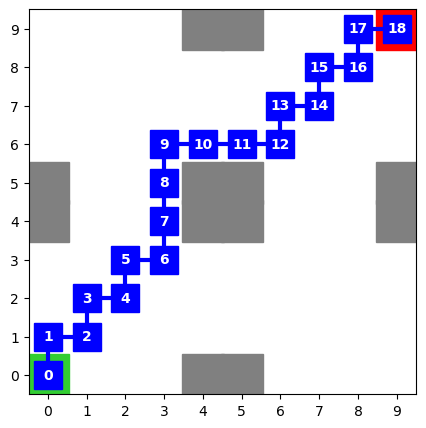

In [2]:
import matplotlib.pyplot as plt

# Size of squares to be plotted
msize = 20

# Grouping of coordinates for plotting
x0 = [obstacles[i][0] for i in range(len(obstacles))]   # x-coordinates of the obstacles
y0 = [obstacles[i][1] for i in range(len(obstacles))]   # y-coordinates of the obstacles
x1 = [robot_path[i][0] for i in range(len(robot_path))] # x-coordinates of the robot path
y1 = [robot_path[i][1] for i in range(len(robot_path))] # y-coordinates of the robot path

# Plot setup
fig, ax = plt.subplots(figsize=(5,5))
plt.axis([-0.5, 9.5, -0.5, 9.5])
ax.set_xticks(np.arange(0, 10, 1));
ax.set_yticks(np.arange(0, 10, 1));

# Plot obstacles, robot's path, start position and destination
ax.plot(pos_orig[0], pos_orig[1], 's', color = 'limegreen', markersize=msize*1.5) # Starting position shown in green
ax.plot(pos_dest[0], pos_dest[1], 's', color = 'red', markersize=msize*1.5)       # Destination shown in red
ax.plot(x0, y0, 's', color='grey', markersize=msize*1.5)                          # Obstacles shown in grey
ax.plot(x1, y1, 's', color='blue', markersize=msize)                              # Robot path shown in blue
ax.plot(x1, y1, color='blue', linewidth=3)

# Number the steps
for i in range(len(robot_path)):
    ax.text(robot_path[i][0], robot_path[i][1], i, horizontalalignment="center", verticalalignment="center", color="white", fontweight="bold")

plt.show()